<a href="https://colab.research.google.com/github/Abdelrahman26/FarmTopia-CV-Internship/blob/main/FarmTopia-CV-Internship/Anwar/stitching_method_and_StereoBM_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

True

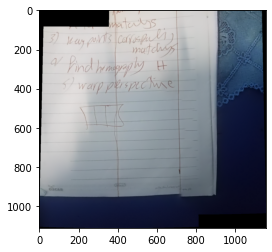

In [ ]:

def readImages(imageString):
	images = []

	# Get images from arguments.
	for i in range(0, len(imageString)):
		img = cv2.imread(imageString[i])
		images.append(img)

	return images

images = readImages(['1.jpeg' , '2.jpeg'])
imageStitcher =cv2.Stitcher_create()
error, stitched_img = imageStitcher.stitch(images)
plt.imshow(stitched_img)
cv2.imwrite("stitched_img.jpg", stitched_img)

(2000, 2964)
left and right images


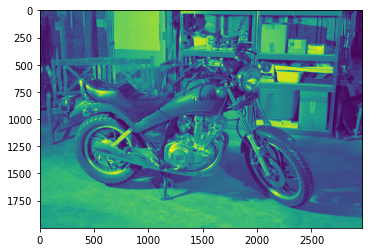

Depth map


In [21]:
left_image = cv2.imread('motorcycle_l.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('motorcycle_r.png', cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=0, blockSize=5)
# For each pixel algorithm will find the best disparity from 0
# Larger block size implies smoother, though less accurate disparity map
depth = stereo.compute(left_image, right_image)

print(depth.shape)

print('left and right images')
plt.imshow(left_image)
plt.show()
plt.imshow( right_image)
plt.show()

print('Depth map')
plt.imshow(depth , 'CMRmap_r')
plt.show()

In [25]:
h, w = left_image.shape[:2]
f = 0.8*w         # guess for focal length
Q = np.float32([[1, 0, 0, -0.5*w],
                [0,-1, 0,  0.5*h], # turn points 180 deg around x-axis,
                [0, 0, 0,     -f], # so that y-axis looks up
                [0, 0, 1,      0]])
points = cv2.reprojectImageTo3D(depth, Q)
print(points.shape)
colors = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
mask = depth > depth.min()
out_points = points[mask]
out_colors = colors[mask]
print(out_points.shape,' ',out_colors.shape)

(2000, 2964, 3)
(2712639, 3)   (2712639, 3)


In [29]:
import plotly.graph_objects as go
pc = out_points[:100000]
print(pc.shape)
fig = go.Figure(data=[go.Scatter3d(x=pc[:,0], y=pc[:,1], z=pc[:,2], mode='markers')])
fig.show()

(100000, 3)
